# Visualizing Earnings Based on College Majors

The dataset that I will be using in this guided project is from American Community Survey. It contains the job outcomes of the students that have been graduated from college between 2010 and 2012.

Some columns that I'll be using in the dataset with the descriptions are as follows:

<b>Rank</b> - Rank by median earnings (the dataset is ordered by this column).  
<b>Major_code</b> - Major code.  
<b>Major</b> - Major description.  
<b>Major_category</b> - Category of major.  
<b>Total</b> - Total number of people with major.  
<b>Sample_size</b> - Sample size (unweighted) of full-time.  
<b>Men</b> - Male graduates.  
<b>Women</b> - Female graduates.  
<b>ShareWomen</b> - Women as share of total.  
<b>Employed</b> - Number employed.  
<b>Median</b> - Median salary of full-time, year-round workers.  
<b>Low_wage_jobs</b> - Number in low-wage service jobs.  
<b>Full_time</b> - Number employed 35 hours or more.  
<b>Part_time</b> - Number employed less than 35 hours.  

I will use:  

-<b>Scatter plots</b> to find out if "students in more popular majors earn more money",  
-<b>Histograms</b> to find out "how many majors are mostly male or mostly female",  
-<b>Bar plots</b> to find out "which category of majors have the most students"

In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [3]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count = recent_grads.count()
raw_data_count

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64

In [7]:
raw_data_count = len(recent_grads)

In [8]:
raw_data_count

173

In [9]:
recent_grads = recent_grads.dropna()
len(recent_grads)

172

First, I dropped the rows that had missing values: One column had null values, that would make a problem while plotting (matplotlib assumes that there are no null values in the columns, so everything would be plotted) so I excluded that column from the dataframe.

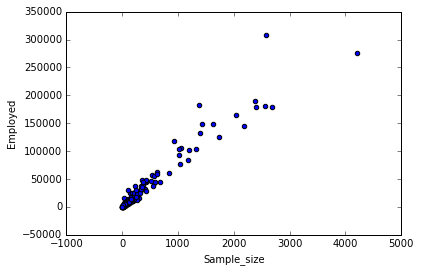

In [10]:
#trying the kind parameter on df.plot() function:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

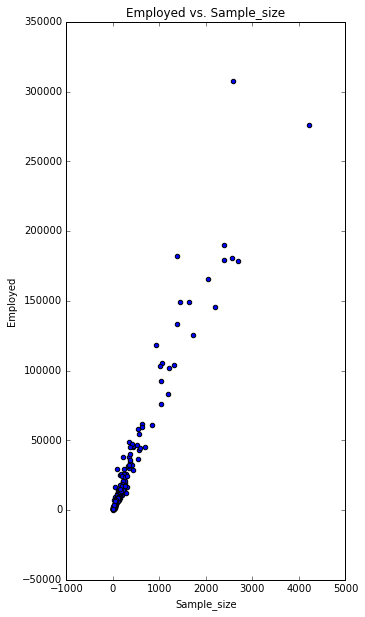

In [11]:
#adding some other parameters
recent_grads.plot(x='Sample_size', y='Employed',kind='scatter',title='Employed vs. Sample_size', figsize=(5,10))

matplotlib.axes._subplots.AxesSubplot

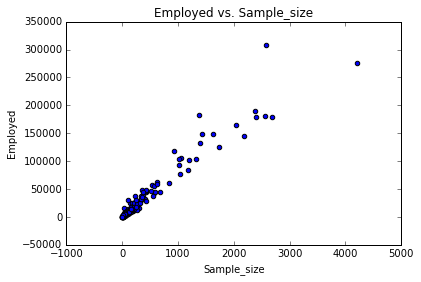

In [12]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')
type(ax)

Behind the curtains, there is a figure object, it's like a container or an empty frame that is containing the graphic. The ax object is the numbers that we see. 

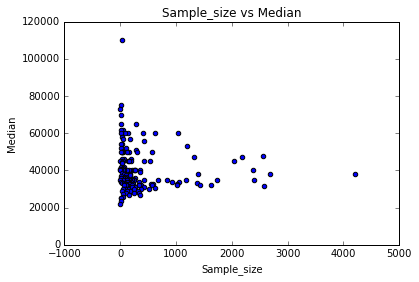

In [13]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter',title='Sample_size vs Median' )

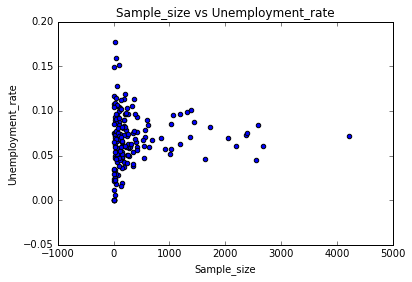

In [14]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter',title='Sample_size vs Unemployment_rate')

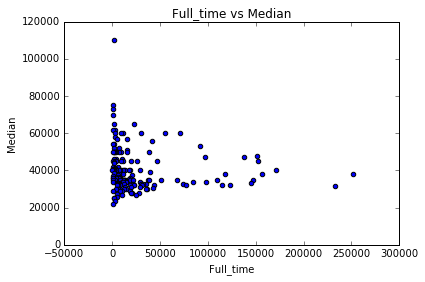

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter',title='Full_time vs Median')

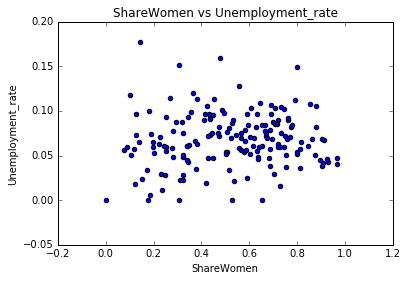

In [16]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs Unemployment_rate')

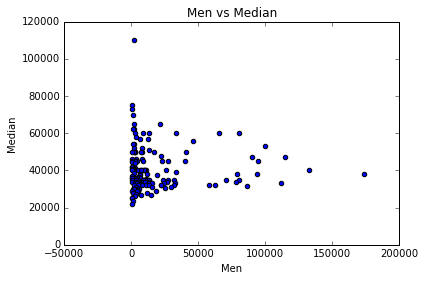

In [17]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs Median')

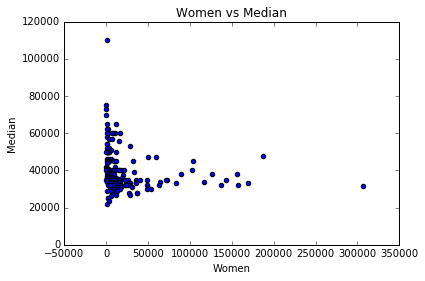

In [18]:
recent_grads.plot(x='Women', y='Median', kind='scatter',title='Women vs Median')

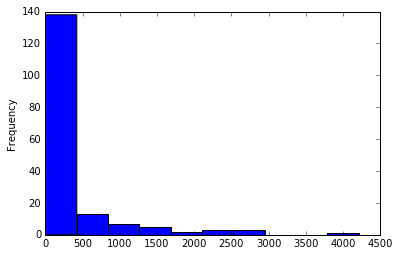

In [19]:
recent_grads['Sample_size'].plot(kind='hist')

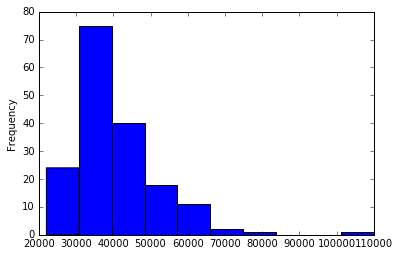

In [20]:
recent_grads['Median'].plot(kind='hist')

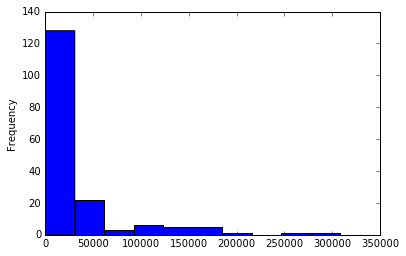

In [21]:
recent_grads['Employed'].plot(kind='hist')

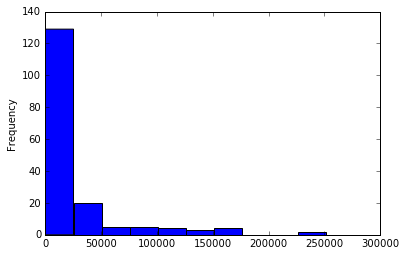

In [22]:
recent_grads['Full_time'].plot(kind='hist')

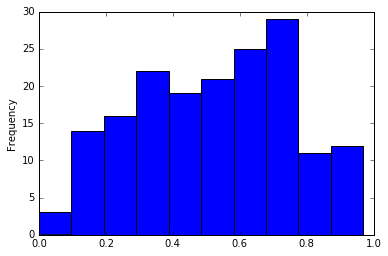

In [23]:
recent_grads['ShareWomen'].plot(kind='hist')

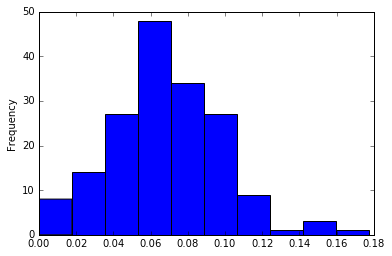

In [24]:
recent_grads['Unemployment_rate'].plot(kind='hist')

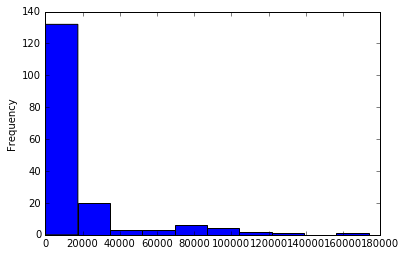

In [25]:
recent_grads['Men'].plot(kind='hist')

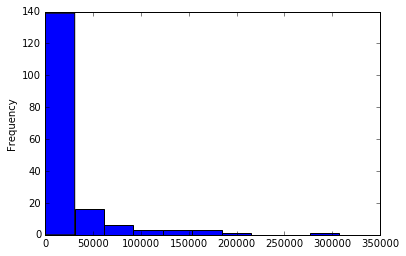

In [26]:
recent_grads['Women'].plot(kind='hist')

In [27]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c95b1d438>,
      dtype=object)

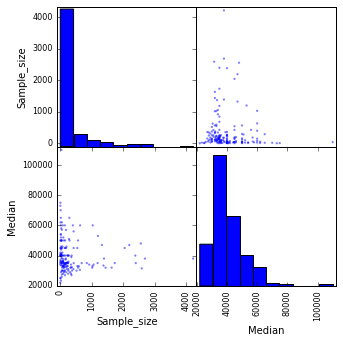

In [28]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9597e978>,
      dtype=object)

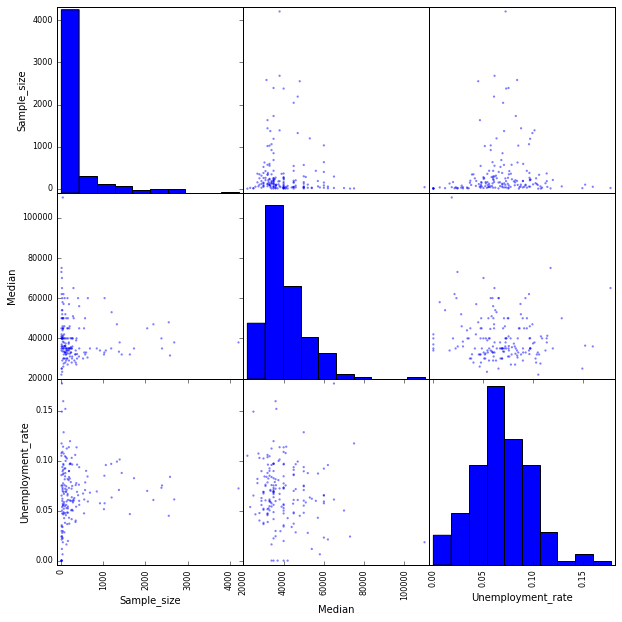

In [29]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']],figsize=(10,10))

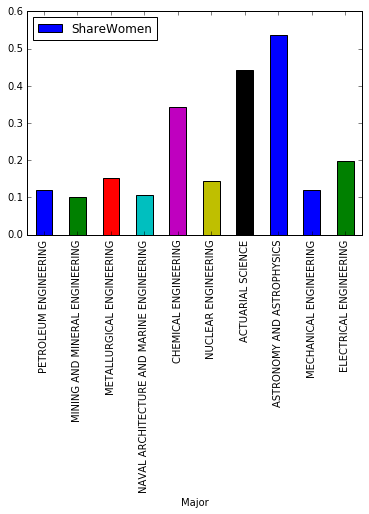

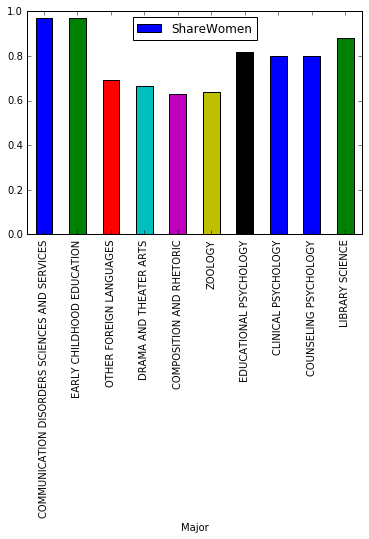

In [30]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

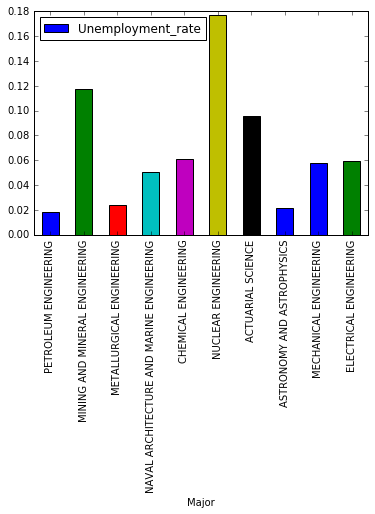

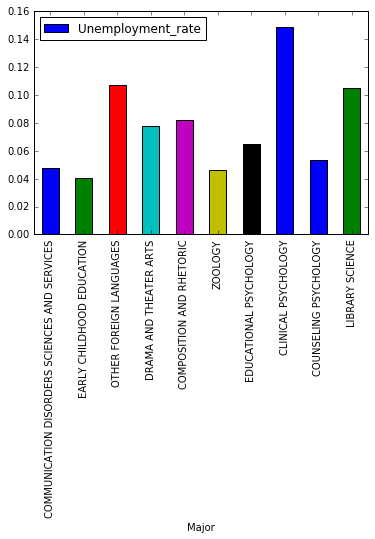

In [31]:
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate')

I will use grouped bar plot in order to find the below question:  

-Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

In [34]:
mvsw = recent_grads.pivot_table(index = 'Major_category', values = ['Men','Women'],aggfunc = np.sum)
mvsw

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


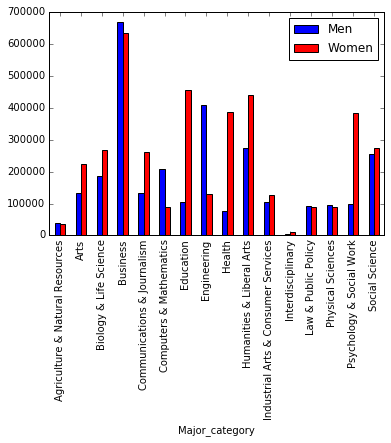

In [35]:
mvsw.plot.bar(x = mvsw.index, y= ['Men','Women'], color=['blue','red'])

Majors categorized in arts, health and social such as Arts, Biology, Education, Health and Psychology have more women workers than men.
In Engineering, Computers and Maths, there are more men than there are women. 

I will use box plot in order to find the answer for the below question:  

-Use a box plot to explore the distributions of median salaries and unemployment rate.

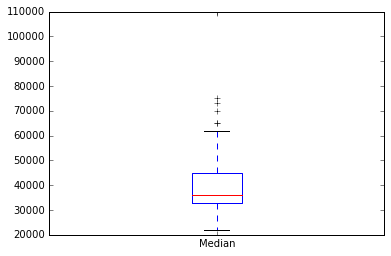

In [36]:
recent_grads['Median'].plot.box()

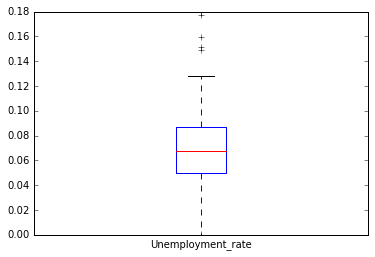

In [37]:
recent_grads['Unemployment_rate'].plot.box()

People who have recently graduated are usually having salary between 35k-45k.
Unemployment rate in recently graduated people is between 5%-9%

Final plot in order to find the answer for the below question:  

-Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

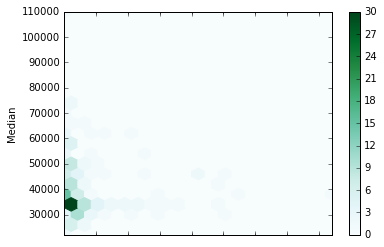

In [38]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=20)